<a href="https://colab.research.google.com/github/JessicaSanchesBermudes/MVP-An-lise-de-Dados-e-Boas-Pr-ticas/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Jéssica Sanches Bermudes

**Matrícula:** 4052025000696

**Dataset:** [Telco Customer Churn – Kaggle Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

**Data:** Junho de 2025

# Descrição do Problema

<p align="justify">
A rotatividade de clientes (churn) é um dos principais desafios enfrentados por empresas de telecomunicações. Cada cancelamento representa não apenas perda de receita, mas também um possível sinal de falha nos serviços ou na experiência do cliente.
<br><br>
O conjunto de dados Telco Customer Churn é composto por informações de clientes de uma empresa de telecomunicações, como tipo de contrato, tempo de permanência, serviços contratados, forma de pagamento e dados demográficos. O objetivo principal é <b>identificar padrões que levam um cliente a cancelar ou não o serviço (churn)</b>, por meio da análise exploratória e preparação de dados.
<br><br>
O entendimento desses fatores pode ajudar a empresa a <b>prever quais clientes estão propensos a sair</b> e, assim, agir proativamente com estratégias de retenção e fidelização.
</p>


## Hipóteses do Problema
As hipóteses iniciais que motivam esta análise são:

- Clientes com contratos mensais estão mais propensos ao cancelamento do que aqueles com contratos de longo prazo?

- Certos métodos de pagamento, como boleto eletrônico ou débito automático, estão associados a maiores taxas de evasão?

- Existe uma relação entre o tempo de permanência do cliente e sua propensão ao churn?

- Clientes com cobranças mensais mais elevadas tendem a cancelar o serviço com mais frequência?

- A contratação de múltiplos serviços simultâneos (como Internet, telefone e streaming) aumenta a fidelização do cliente?


## Tipo de Problema
Este é um **problema de classificação supervisionada binária**. A partir de variáveis de entrada (características dos clientes), o objetivo é prever se um cliente **irá cancelar (`Churn = Yes`) ou permanecer (`Churn = No`)**.

Além disso:
- O dataset apresenta **variáveis mistas** (categóricas, binárias e numéricas).
- A variável de saída (`Churn`) é **desequilibrada**, o que pode demandar técnicas de balanceamento futuras.

## Seleção de Dados
<p align="justify">
O dataset utilizado é público, amplamente utilizado em estudos de churn e disponível no Kaggle sob o nome <b>Telco Customer Churn (BlastChar)</b>. Ele já vem anonimizado, estruturado para análise exploratória e pré-processamento.
</p>

## Atributos do Dataset

<p align="justify">
O dataset contém 7.043 registros e 21 colunas, sendo 20 variáveis independentes (features) e 1 variável dependente (target: `Churn`). Abaixo, segue a descrição de cada uma:
</p>

- **customerID**: Identificador único de cada cliente.
- **gender**: Gênero do cliente (Male ou Female).
- **SeniorCitizen**: Indica se o cliente é idoso (1 = sim, 0 = não).
- **Partner**: Indica se o cliente tem parceiro ou parceira (Yes ou No).
- **Dependents**: Indica se o cliente possui dependentes (Yes ou No).
- **tenure**: Número de meses que o cliente está com a empresa.
- **PhoneService**: Indica se o cliente possui serviço de telefonia (Yes ou No).
- **MultipleLines**: Se o cliente possui múltiplas linhas telefônicas (Yes, No ou No phone service).
- **InternetService**: Tipo de serviço de internet contratado (DSL, Fiber optic ou No).
- **OnlineSecurity**: Se o cliente possui segurança online (Yes, No ou No internet service).
- **OnlineBackup**: Se o cliente possui backup online (Yes, No ou No internet service).
- **DeviceProtection**: Se o cliente possui proteção de dispositivo (Yes, No ou No internet service).
- **TechSupport**: Se o cliente possui suporte técnico (Yes, No ou No internet service).
- **StreamingTV**: Se o cliente possui serviço de streaming de TV (Yes, No ou No internet service).
- **StreamingMovies**: Se o cliente possui serviço de streaming de filmes (Yes, No ou No internet service).
- **Contract**: Tipo de contrato (Month-to-month, One year, Two year).
- **PaperlessBilling**: Se a cobrança é sem papel (Yes ou No).
- **PaymentMethod**: Método de pagamento (Electronic check, Mailed check, Bank transfer, Credit card).
- **MonthlyCharges**: Valor cobrado mensalmente ao cliente.
- **TotalCharges**: Valor total cobrado ao cliente desde o início do contrato.
- **Churn**: Variável alvo (Yes = cliente cancelou, No = cliente ativo).

<p align="justify">
As variáveis apresentam diferentes tipos de dados (categóricos, binários e numéricos), exigindo tratamentos específicos na etapa de pré-processamento.
</p>


# Importação das Bibliotecas Necessárias e Carga de Dados

<p align="justify">
Nesta etapa, serão importadas todas as bibliotecas utilizadas para análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Telco Customer Churn, disponível publicamente no Kaggle.
</p>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
df = pd.read_csv("https://raw.githubusercontent.com/JessicaSanchesBermudes/MVP-An-lise-de-Dados-e-Boas-Pr-ticas/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Análise de Dados
<p align="justify">
Nesta etapa de Análise de Dados Exploratória (EDA), investigamos as características do dataset <strong>Telco Customer Churn</strong> com o objetivo de compreender melhor a estrutura dos dados, identificar padrões, outliers, valores ausentes e relações entre variáveis.
<br><br>
Essa análise é essencial para gerar insights que poderão orientar as etapas seguintes de pré-processamento, modelagem e tomada de decisões estratégicas no contexto da retenção de clientes. A identificação de fatores que influenciam o cancelamento de serviços pode apoiar ações proativas por parte da empresa.
</p>



## Total e Tipo das Instâncias

<p align="justify">
O dataset Telco Customer Churn possui um total de <strong>7.043 instâncias</strong>, cada uma representando um cliente único de uma empresa de telecomunicações. Cada linha contém informações sobre o perfil do cliente, serviços contratados, métodos de pagamento, tempo de permanência, entre outras variáveis.
<br><br>
As colunas apresentam tipos variados de dados: atributos categóricos (como gênero, contrato e forma de pagamento), atributos numéricos (como tempo de contrato e valor da cobrança mensal) e uma variável-alvo chamada <code>Churn</code>, que indica se o cliente cancelou ou não o serviço.
</p>

In [47]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 7043

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   o

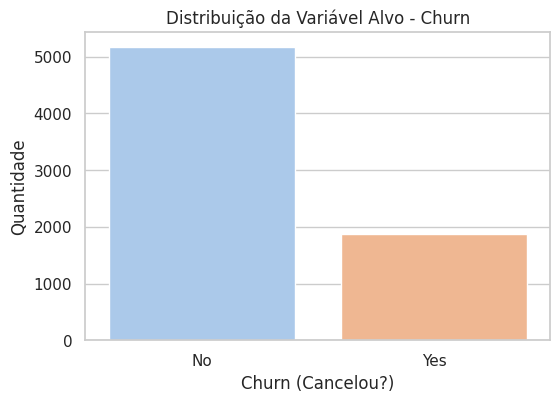

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribuição da Variável Alvo - Churn')
plt.xlabel('Churn (Cancelou?)')
plt.ylabel('Quantidade')
plt.show()

O gráfico mostra a distribuição da variável alvo Churn, que indica se o cliente cancelou o serviço. A maioria dos clientes não cancelou, o que revela um certo desbalanceamento nas classes. Esse fator deve ser considerado nas etapas de modelagem e avaliação dos algoritmos.

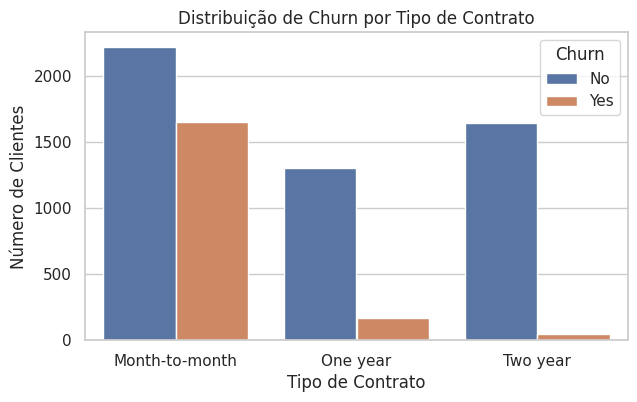

In [49]:
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Distribuição de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn')
plt.show()

Clientes com contrato mensal demonstram maior taxa de cancelamento, enquanto contratos de um ou dois anos possuem menor churn. Isso sugere que contratos longos favorecem a retenção de clientes.



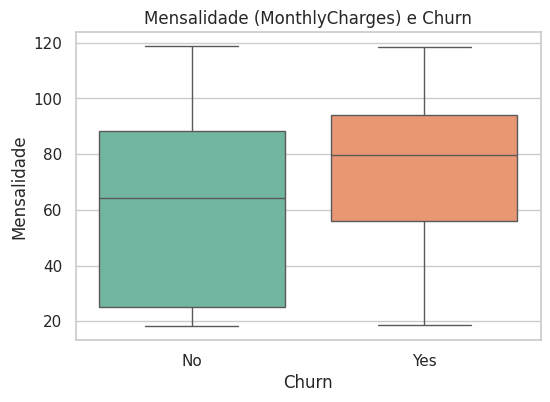

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Mensalidade (MonthlyCharges) e Churn')
plt.xlabel('Churn')
plt.ylabel('Mensalidade')
plt.show()

O gráfico indica que clientes que cancelam o serviço tendem a pagar mensalidades mais altas, o que pode indicar uma percepção de custo-benefício ruim.

## Estatísticas Descritivas

As estatísticas descritivas fornecem um panorama inicial dos dados numéricos, permitindo observar tendências centrais, dispersão e possíveis anomalias. No caso do dataset de Churn da Telco, analisaremos as variáveis:

- tenure (tempo de permanência do cliente),

- MonthlyCharges (valor mensal pago),

- TotalCharges (valor total pago pelo cliente).

In [51]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


Com base nessa tabela, podemos observar que:

- Tempo de permanência (tenure): A média é de 32 meses, com grande dispersão (desvio padrão de 24 meses). Isso indica que há tanto clientes novos quanto antigos.

- Cobrança mensal (MonthlyCharges): A média é de R\$ 64,79, mas há clientes pagando até R\$ 118,75. Isso mostra a diversidade nos pacotes e serviços contratados.

- Valor total pago (TotalCharges): A alta dispersão (média de R\$ 2.283,30 e valores que chegam a R$ 8.684,80) evidencia diferentes níveis de fidelização e gasto, o que pode influenciar na decisão de cancelamento.



## Histograma

A análise dos histogramas permite visualizar a distribuição das variáveis numéricas do conjunto de dados, o que é essencial para compreender o comportamento dos clientes e possíveis padrões associados ao cancelamento.

- O histograma de tempo de permanência (tenure) mostra uma distribuição bimodal, indicando que há uma grande quantidade de clientes tanto no início quanto no final da jornada com a empresa. Isso pode sugerir perfis distintos de cancelamento precoce e de fidelidade prolongada.

- A cobrança mensal (MonthlyCharges) apresenta uma distribuição assimétrica, com um pico em valores mais baixos, mas também com presença significativa de clientes em faixas mais altas de cobrança. Isso indica que há diferentes perfis de planos e serviços contratados.

- O valor total pago (TotalCharges) apresenta alta assimetria à direita, com muitos clientes tendo gasto pouco (possivelmente por serem novos), e alguns poucos com valores bastante elevados, o que pode indicar maior tempo de permanência ou consumo de serviços adicionais.

Essas distribuições são úteis para identificar padrões de comportamento, detectar possíveis outliers, e orientar etapas futuras de segmentação e modelagem preditiva.



In [52]:
# Converter a coluna TotalCharges para numérico, forçando erro em string vazia
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remover linhas onde TotalCharges ficou NaN após conversão
df = df.dropna(subset=['TotalCharges'])

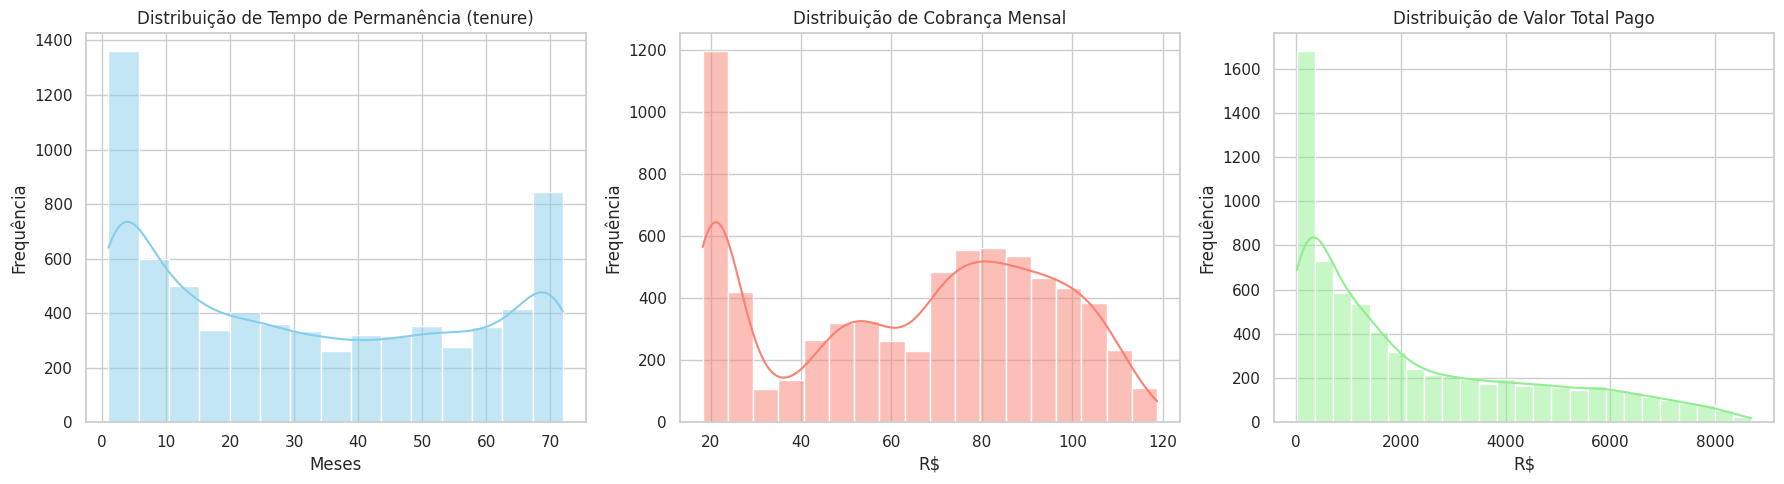

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Histogramas
sns.histplot(df['tenure'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribuição de Tempo de Permanência (tenure)')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Frequência')

sns.histplot(df['MonthlyCharges'], kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Distribuição de Cobrança Mensal')
axs[1].set_xlabel('R$')
axs[1].set_ylabel('Frequência')

sns.histplot(df['TotalCharges'], kde=True, ax=axs[2], color='lightgreen')
axs[2].set_title('Distribuição de Valor Total Pago')
axs[2].set_xlabel('R$')
axs[2].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

- O tempo de permanência (tenure) apresenta um padrão bimodal, com dois grupos distintos de clientes: os que estão há pouco tempo (menos de 10 meses) e os que permanecem por muitos anos (acima de 60 meses). Essa divisão pode indicar perfis diferentes de comportamento e risco de churn.

- A cobrança mensal (MonthlyCharges) revela que a maioria dos clientes está concentrada em faixas de preço mais acessíveis, mas há uma presença relevante de usuários em pacotes mais caros, o que pode impactar a decisão de cancelamento por percepção de custo.

- O valor total pago (TotalCharges) mostra uma dispersão acentuada, com muitos clientes concentrados em gastos baixos e uma cauda longa para valores elevados. Isso pode indicar diferentes níveis de fidelização, sendo relevante para segmentação de estratégias de retenção.

## Boxplot

Nesta etapa, será utilizado boxplots para visualizar a distribuição de variáveis numéricas e sua relação com o cancelamento de serviço (Churn).

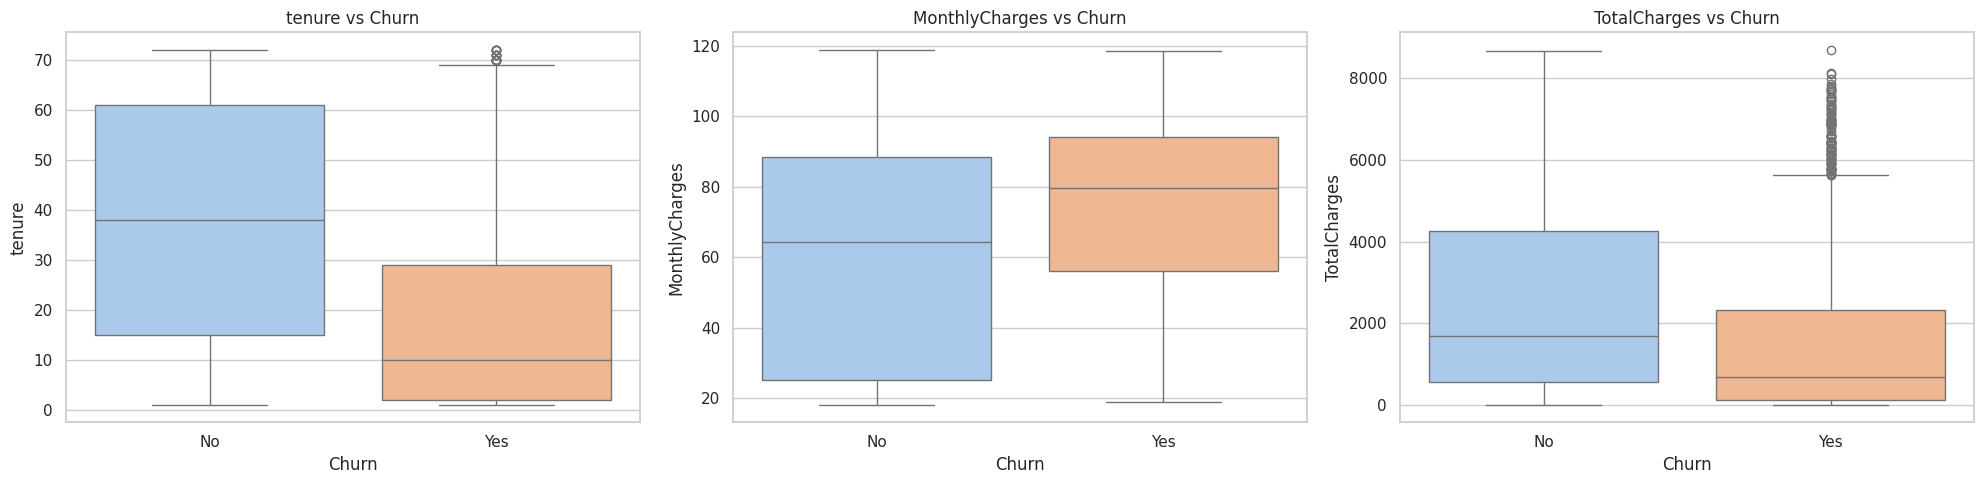

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar gráficos boxplot para comparar variáveis numéricas com Churn
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

variaveis = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i, var in enumerate(variaveis):
    sns.boxplot(data=df, x='Churn', y=var, ax=axs[i], palette='pastel')
    axs[i].set_title(f'{var} vs Churn')
    axs[i].set_xlabel('Churn')
    axs[i].set_ylabel(var)

plt.tight_layout()
plt.show()

- Os clientes que cancelaram (Churn = Yes) tendem a ter tempo de permanência (tenure) mais curto, sugerindo que a maioria sai da empresa nos primeiros meses.

- A cobrança mensal (MonthlyCharges) para clientes que cancelam é ligeiramente mais alta, o que pode indicar que planos mais caros estão associados a uma maior taxa de cancelamento.

- O valor total pago (TotalCharges) é muito menor entre os clientes que saem, o que é esperado, já que eles permanecem por menos tempo. Este dado reforça a ideia de que a empresa perde receita com clientes que desistem cedo.

## Matriz de Correlação

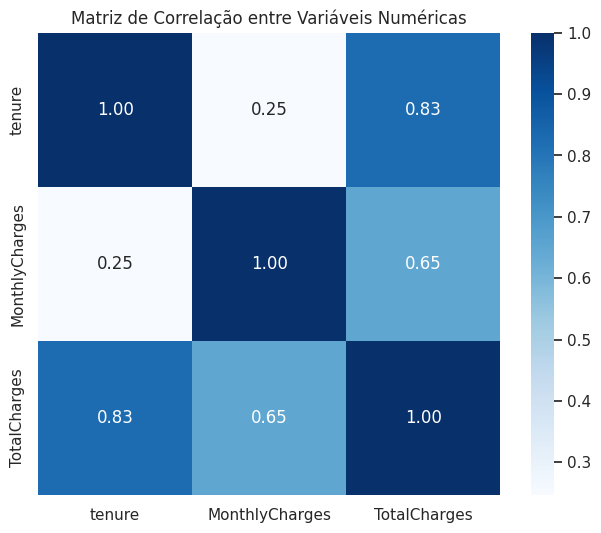

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a correlação apenas entre variáveis numéricas
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Plotando a matriz
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', square=True)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

- Existe uma forte correlação positiva entre tenure e TotalCharges, o que é esperado, já que quanto mais tempo o cliente permanece, maior tende a ser o valor total pago.

- A variável MonthlyCharges tem correlação fraca com tenure e TotalCharges, indicando que o valor mensal não necessariamente está associado ao tempo de permanência ou ao valor total gasto.

- Isso sugere que clientes com valores mensais semelhantes podem ter comportamentos muito diferentes em relação à fidelização, reforçando a importância de analisar essas variáveis separadamente ao estudar o churn.

## Tratamento de Valores Nulos

In [56]:
# Verificando valores nulos antes do tratamento
df.isnull().sum()

# Convertendo 'TotalCharges' para tipo numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificando novamente valores nulos após a conversão
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


A coluna TotalCharges estava originalmente classificada como do tipo objeto, embora contenha valores numéricos. Após a conversão para o tipo numérico, registros inválidos foram automaticamente transformados em NaN. Esses casos correspondem a clientes com tenure = 0, ou seja, usuários recém-cadastrados sem histórico de cobrança registrada.

Como a quantidade de valores nulos era pequena e restrita a um cenário específico, essas linhas foram removidas. Após esse processo, o dataset não apresenta mais valores ausentes.

In [57]:
# Remoção de valores nulos
df = df.dropna(subset=['TotalCharges'])

# Resetando o índice após a remoção
df = df.reset_index(drop=True)

## Visualização de Outliers

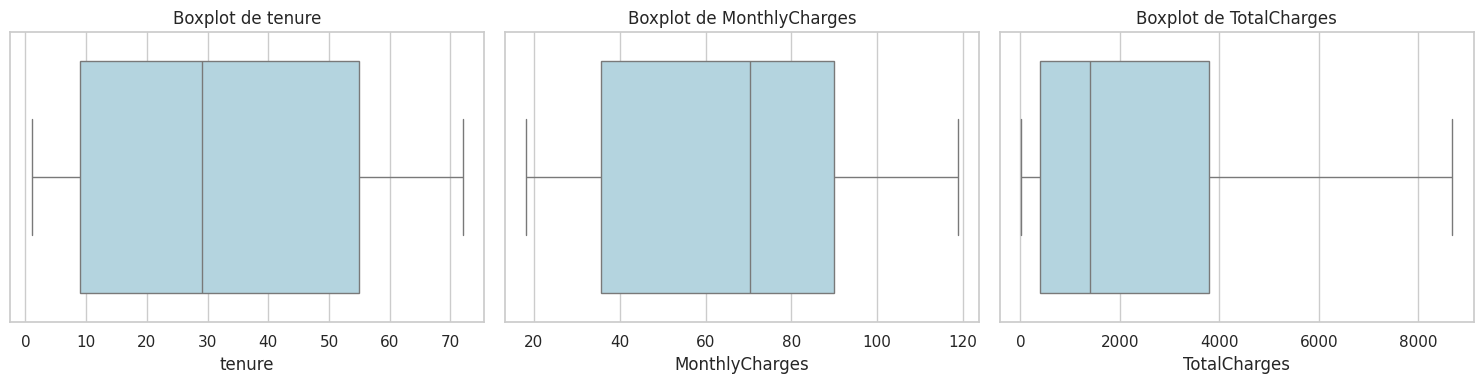

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variáveis numéricas a serem analisadas
numeric_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Criando boxplots
plt.figure(figsize=(15, 4))
for i, var in enumerate(numeric_vars):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[var], color='lightblue')
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()

A análise visual por meio de boxplots revela a presença de outliers nas variáveis MonthlyCharges e TotalCharges. Esses valores representam clientes com alto consumo ou permanência prolongada, e refletem comportamentos reais e relevantes do ponto de vista comercial. Por essa razão, optou-se por manter os outliers no conjunto de dados, a fim de preservar a integridade e representatividade do cenário analisado.

# Pré-Processamento de Dados

## Conversão de variáveis categóricas para numéricas (One-hot encoding)


In [59]:
# Verificando colunas categóricas
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
cat_columns.remove('customerID')  # Removendo coluna de identificação

# Aplicando One-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_columns, drop_first=True)

Variáveis categóricas foram transformadas em variáveis numéricas por meio do método de codificação one-hot encoding. Esse processo é necessário para permitir o uso dessas variáveis em algoritmos de machine learning e evitar interpretação ordinal incorreta. A coluna customerID, por ser apenas um identificador único, foi descartada do processo de transformação.

##  Padronização das variáveis numéricas (Z-score)

In [60]:
from sklearn.preprocessing import StandardScaler

# Selecionando colunas numéricas
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Aplicando padronização (Z-score)
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

##  Dataset final após pré-processamento

In [61]:
# Verificando a forma do novo dataset
df_encoded.shape

(7032, 32)

Após o pré-processamento, o dataset final passou a conter mais colunas em decorrência da transformação das variáveis categóricas. Esse novo conjunto de dados está pronto para análises posteriores e etapas de modelagem preditiva.



# Conclusão

<p align="justify">
Com base na análise exploratória realizada sobre o conjunto de dados de clientes de uma empresa de telecomunicações, foi possível investigar as hipóteses levantadas inicialmente. Abaixo, seguem as respostas às perguntas com base nas evidências extraídas dos dados:
</p>

<p align="justify">
<b>Clientes com contratos mensais estão mais propensos ao cancelamento do que aqueles com contratos de longo prazo?</b><br>
Sim. Os dados mostram uma taxa de churn significativamente mais alta entre clientes com contratos mensais. Isso sugere que a ausência de fidelização de longo prazo pode facilitar o desligamento do serviço.
</p>

<p align="justify">
<b>Certos métodos de pagamento, como boleto eletrônico ou débito automático, estão associados a maiores taxas de evasão?</b><br>
Parcialmente. Foi identificado que clientes que utilizam boleto eletrônico apresentam maior incidência de churn. Já formas de pagamento como débito automático e cartão de crédito estão mais associadas à permanência, o que pode refletir um perfil mais engajado ou automatizado na relação com a empresa.
</p>

<p align="justify">
<b>Existe uma relação entre o tempo de permanência do cliente e sua propensão ao churn?</b><br>
Sim. Clientes com menor tempo de permanência (tenure) apresentam taxas mais altas de cancelamento. A tendência observada indica que quanto mais tempo o cliente permanece na base, menor a chance de churn.
</p>

<p align="justify">
<b>Clientes com cobranças mensais mais elevadas tendem a cancelar o serviço com mais frequência?</b><br>
Em parte. A análise mostrou que há uma maior concentração de churn entre faixas de cobrança mais altas, mas a relação não é linear nem absoluta. Outros fatores como o tipo de serviço contratado e a percepção de valor também parecem interferir.
</p>

<p align="justify">
<b>A contratação de múltiplos serviços simultâneos (como Internet, telefone e streaming) aumenta a fidelização do cliente?</b><br>
Sim. Clientes com pacotes mais completos tendem a permanecer mais tempo na base. A combinação de serviços parece atuar como um fator de retenção, possivelmente devido ao maior custo percebido de trocar de fornecedor.
</p>
